# Logistic Regression

In [4]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# Loading Dataset 

In [5]:
df = pd.read_csv('prepared_dataset.csv')
df.head(2)

,Unnamed: 0,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,churn_risk,Churn
0,0,0.0,0.000000,0.115595,0.001429,1.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.696550,0
1,1,0.0,0.464789,0.385650,0.241903,0.0,1.0,1.0,0.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.554706,0


In [6]:
df = pd.read_csv('prepared_dataset.csv')
# This code is preparing the data for a machine learning model.
y = df['Churn'].values
X = df.drop(columns = ['Churn','Unnamed: 0'])

## Spliting Data into Train Test Split.

In [7]:
# The line of code is splitting the dataset `X` and `y` into training and testing sets. The training set is stored in `X_train` and `y_train`, while the testing set is stored in `X_test` and `y_test`. The `test_size` parameter specifies the proportion of the dataset that should be allocated for testing (in this case, 20% of the data). The `random_state` parameter is used to ensure reproducibility of the split.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [8]:
# Running linear regression model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(max_iter=1000)
result = model.fit(X_train, y_train)

In [9]:
# This code snippet is using the scikit-learn library (sklearn) to calculate the accuracy of a machine learning model's predictions.
from sklearn import metrics
prediction_test = model.predict(X_test)
# Print the prediction accuracy
print (metrics.accuracy_score(y_test, prediction_test))

0.7800995024875622


In [10]:
from telecom_churn_utilities import p_r_curve,evaluate_at_threshold

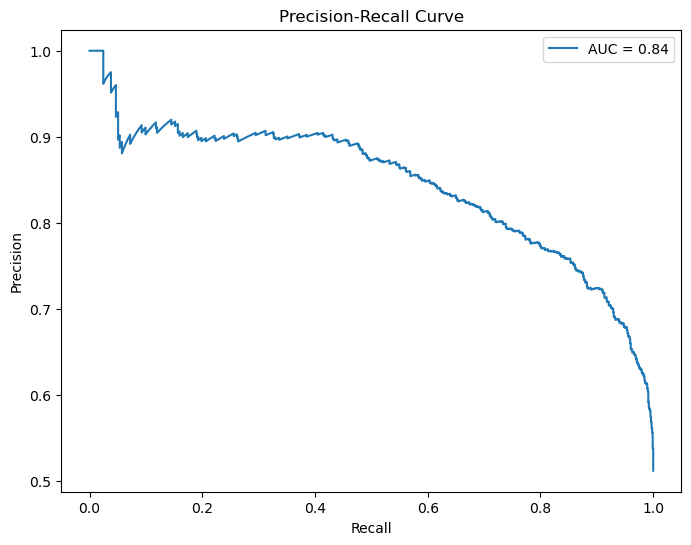

In [11]:
from sklearn.metrics import precision_recall_curve, auc
# Make predictions on the test set
y_proba = model.predict_proba(X_test)[:, 1]

optimal_threshold = p_r_curve(y_test, y_proba)

Threshold: 0.38386958515061287


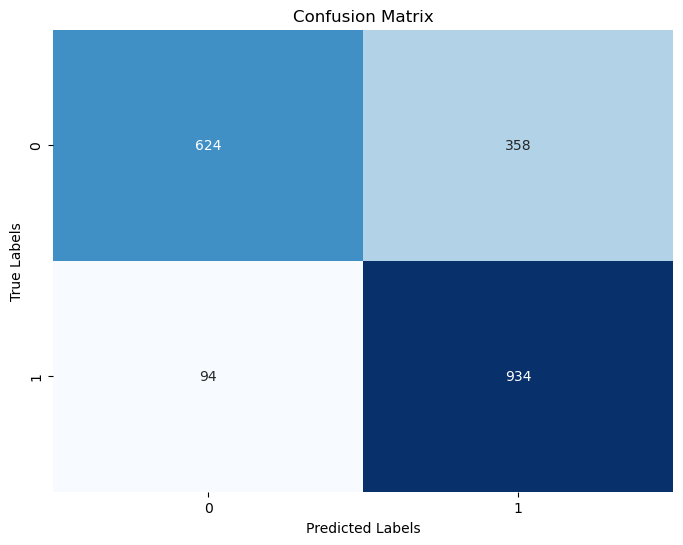

Accuracy: 0.7751243781094528
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.64      0.73       982
           1       0.72      0.91      0.81      1028

    accuracy                           0.78      2010
   macro avg       0.80      0.77      0.77      2010
weighted avg       0.79      0.78      0.77      2010

AUC-ROC Score:
0.7719990965788868




In [12]:
evaluate_at_threshold(y_test, y_proba, optimal_threshold)

## Now find the best parameters for model by using Randomized Search Cross Validation.

In [13]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform

# Define the Polynomial Features and Standard Scaler in a pipeline
# poly_features = PolynomialFeatures(degree=2, include_bias=False)

# poly_X = poly_features.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

# Define the logistic regression model
logistic_model = LogisticRegression()


# Define hyperparameters to tune and their possible values
param_dist = {
    'penalty': ['l1', 'l2'],
    'C': uniform(loc=0.001, scale=1),  # C is drawn from a uniform distribution between 0 and 4
    'solver': ['newton-cg', 'lbfgs', 'liblinear'],
    'max_iter': [500, 700, 1000],
    'class_weight': [None, 'balanced'],
}

# Perform Randomized Search Cross-Validation
search = RandomizedSearchCV(logistic_model, param_distributions=param_dist, n_iter=10, cv=5, random_state=42, scoring='accuracy')
search.fit(X_train, y_train)

# Print the best parameters and score
print('Best parameters:', search.best_params_)
print('Best score:', search.best_score_)

# Evaluate the model on the test set
test_score = search.score(X_test, y_test)
print('Test set accuracy:', test_score)


Best parameters: {'C': 0.5257564316322378, 'class_weight': 'balanced', 'max_iter': 500, 'penalty': 'l1', 'solver': 'liblinear'}
Best score: 0.7873840195413722
Test set accuracy: 0.7820895522388059


C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py:542: FitFailedWarning: 
10 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\model_selection\_validation.py", line 890, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\786\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py", line 1351, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\786\AppData\Roaming\Python\Python311\site-packages\

Now we going to train our best_model on whole dataset.

In [14]:
best_lr = LogisticRegression(**search.best_params_)
best_lr.fit(X,y)

LogisticRegression(C=0.5257564316322378, class_weight='balanced', max_iter=500,
                   penalty='l1', solver='liblinear')

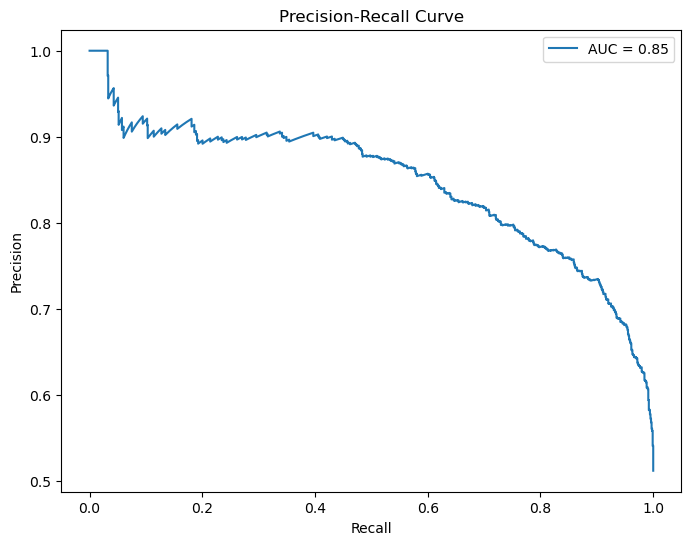

In [15]:
y_proba = best_lr.predict_proba(X_test)[:, 1]
optimal_threshold = p_r_curve(y_test, y_proba)

Threshold: 0.40540127328740166


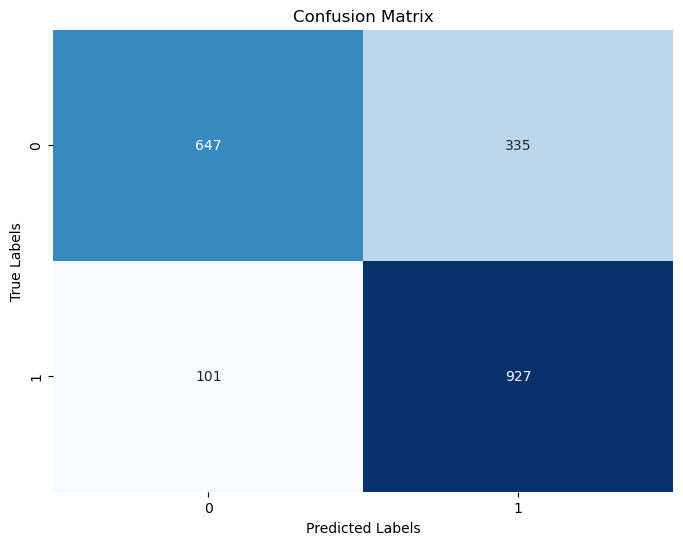

Accuracy: 0.7830845771144279
Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.66      0.75       982
           1       0.73      0.90      0.81      1028

    accuracy                           0.78      2010
   macro avg       0.80      0.78      0.78      2010
weighted avg       0.80      0.78      0.78      2010

AUC-ROC Score:
0.7803052216155388




In [16]:
evaluate_at_threshold(y_test, y_proba, optimal_threshold)

# Saving Best Model

In [17]:
import joblib
# Save the model to a file
joblib.dump(best_lr, 'best_lr.pkl')

['best_lr.pkl']